In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, calendar, time
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.ticker
%matplotlib inline

Read in the buildings file

In [3]:
header = ['id','user','version','minVersion','validSince','validUntil','name']
buildings = pd.read_csv('../data/denver-buildings.data',names=header, sep='\t')

Calculate new columns and convert to Python objects

In [4]:
buildings['date'] = buildings.validSince.apply(lambda x: pd.Timestamp(x*1000000000).date())
buildings.replace("false", np.NaN, inplace=True)
buildings.validUntil = buildings['validUntil'].astype(float)

In [5]:
buildings.id.count(), buildings.id.nunique(), buildings.user.nunique(), buildings.query('version==1').id.count()

(333565, 172645, 1279, 185864)

Set all `validUntil` dates to today

In [10]:
TIME_NOW = calendar.timegm(time.gmtime())
buildings.validUntil.replace(np.NaN, TIME_NOW, inplace=True)
buildings.validUntil = buildings.validUntil.astype(int)
buildings['lifespan'] = buildings.apply(lambda r: r.validUntil - r.validSince, axis=1)

Look at what we're working with

In [11]:
buildings.head(1)

,id,user,version,minVersion,validSince,validUntil,name,date,lifespan
0,579010860,rsavoye,1,0.0,1523473456,1537318540,NaN,2018-04-11,13845084


In [12]:
buildings.dtypes

id              int64
user           object
version         int64
minVersion    float64
validSince      int64
validUntil      int64
name           object
date           object
lifespan        int64
dtype: object

In [13]:
buildings.head(3)

,id,user,version,minVersion,validSince,validUntil,name,date,lifespan
0,579010860,rsavoye,1,0.0,1523473456,1537318540,NaN,2018-04-11,13845084
1,579011456,rsavoye,1,0.0,1523473559,1537318540,NaN,2018-04-11,13844981
2,579011344,rsavoye,1,0.0,1523473538,1537318540,NaN,2018-04-11,13845002


In [14]:
latest_versions = buildings.query("validUntil=={0}".format(TIME_NOW))

In [15]:
sns.set_style("dark")
ax = plt.figure(num=None, figsize=(10, 2), dpi=95)
buildings.height.hist(bins=20)
fig = plt.gcf()
fig.autofmt_xdate()

AttributeError: 'DataFrame' object has no attribute 'height'

When were buildings created in Denver?

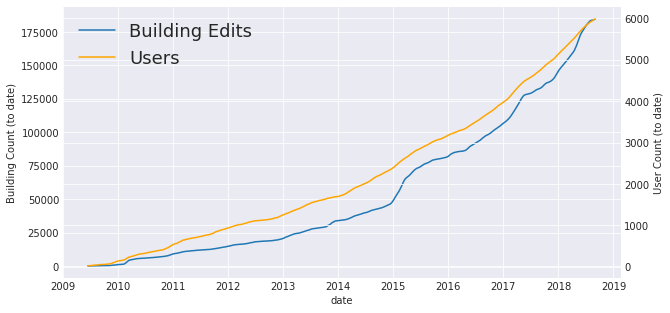

In [16]:
gb_dates = buildings.query('version==1').groupby('date').aggregate({'id':pd.Series.count, 'user': pd.Series.nunique})
sns.set_style("darkgrid"); axes = []
axes.append( gb_dates.id.cumsum().rolling(window=30).mean().plot(figsize=(10,5)) )
axes.append( gb_dates.user.cumsum().rolling(window=30).mean().plot(figsize=(10,5), color='orange', ax=axes[0].twinx()) )
lines, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    line, label = ax.get_legend_handles_labels()
    lines += line
axes[-1].legend(lines, ['Building Edits','Users'], loc=0, fontsize=18);
axes[0].set_ylabel('Building Count (to date)');
axes[1].set_ylabel('User Count (to date)');

What about the latest edits to buildings?

In [17]:
gb_dates = latest_versions.groupby('date').aggregate({'id':pd.Series.count, 'user': pd.Series.nunique})

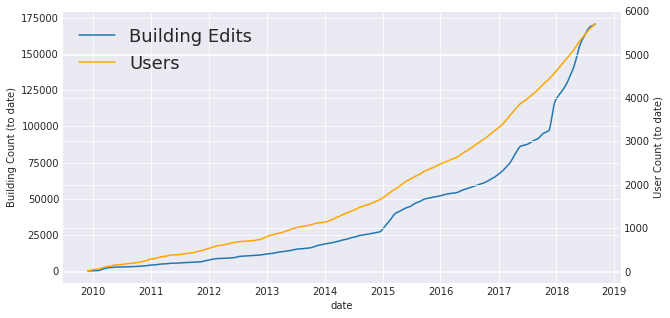

In [18]:
sns.set_style("darkgrid"); axes = []
axes.append( gb_dates.id.cumsum().rolling(window=30).mean().plot(figsize=(10,5)) )
axes.append( gb_dates.user.cumsum().rolling(window=30).mean().plot(figsize=(10,5), color='orange', ax=axes[0].twinx()) )
lines, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    line, label = ax.get_legend_handles_labels()
    lines += line
axes[-1].legend(lines, ['Building Edits','Users'], loc=0, fontsize=18);
axes[0].set_ylabel('Building Count (to date)');
axes[1].set_ylabel('User Count (to date)');

How long between building edits?

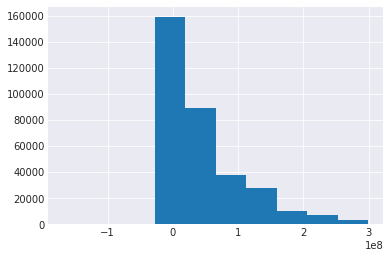

In [19]:
buildings.lifespan.hist()

# Versions

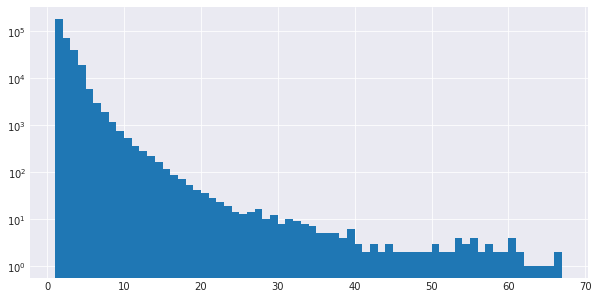

In [20]:
ax = buildings.version.hist(figsize=(10,5),bins=np.arange(1,buildings.version.max(),1))
ax.set_yscale('log')

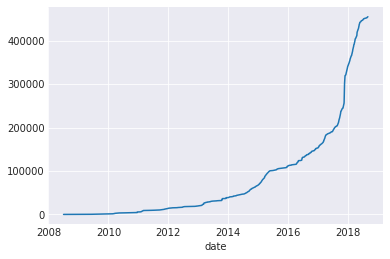

In [21]:
buildings.query('version>1').groupby('date').aggregate({'user':pd.Series.nunique, 'version':sum}).version.cumsum().plot()

In [22]:
buildings.sort_values(by='version', ascending=False)

,id,user,version,minVersion,validSince,validUntil,name,date,lifespan
291778,25650822,micha_k,68,0.0,1531249791,1537318540,Union Station,2018-07-10,6068749
291777,25650822,chachafish,67,0.0,1526874392,1531249791,Union Station,2018-05-21,4375399
291776,25650822,chachafish,66,0.0,1526874302,1526874392,Union Station,2018-05-21,90
291775,25650822,chachafish,65,0.0,1526874041,1526874302,Union Station,2018-05-21,261
291774,25650822,chachafish,64,0.0,1510287324,1526874041,Union Station,2017-11-10,16586717
291773,25650822,chachafish,63,0.0,1510156071,1510287324,Union Station,2017-11-08,131253
291772,25650822,chachafish,62,0.0,1510057567,1510156071,Union Station,2017-11-07,98504
299296,34008043,chachafish,61,0.0,1526878577,1537318540,Colorado State Capitol,2018-05-21,10439963
291765,25650822,chachafish,61,0.0,1509964310,1510057567,Union Station,2017-11-06,93257
299294,34008043,chachafish,60,1.0,1526749593,1526751609,Colorado State Capitol,2018-05-19,2016


# Learning about Names

In [23]:
buildings_gb_date = buildings[buildings.name.notnull()].groupby('date')

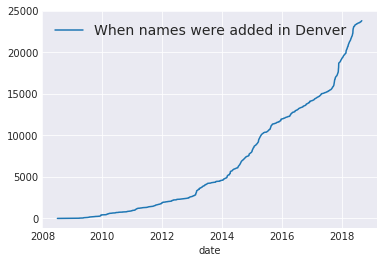

In [25]:
sns.set_style('darkgrid')
ax = buildings_gb_date.aggregate({'id':'nunique'}).cumsum().plot()
ax.legend(['When names were added in Denver'],fontsize=14)

In [26]:
gb_dates = buildings.groupby('date').aggregate({'id':pd.Series.count, 'user': pd.Series.nunique, 'name':'count'})

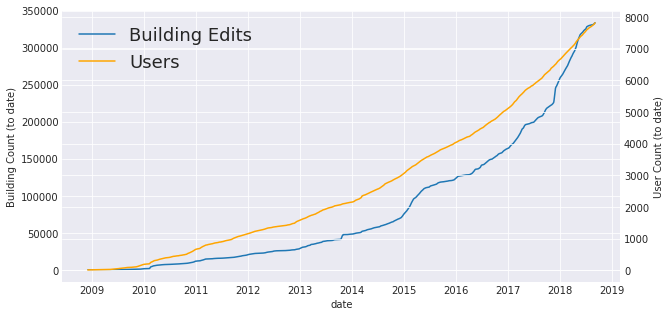

In [27]:
sns.set_style("darkgrid"); axes = []
axes.append( gb_dates.id.cumsum().rolling(window=7).mean().plot(figsize=(10,5)) )
axes.append( gb_dates.user.cumsum().rolling(window=7).mean().plot(figsize=(10,5), color='orange', ax=axes[0].twinx()) )
lines, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    line, label = ax.get_legend_handles_labels()
    lines += line
axes[-1].legend(lines, ['Building Edits','Users'], loc=0, fontsize=18);
axes[0].set_ylabel('Building Count (to date)');
axes[1].set_ylabel('User Count (to date)');

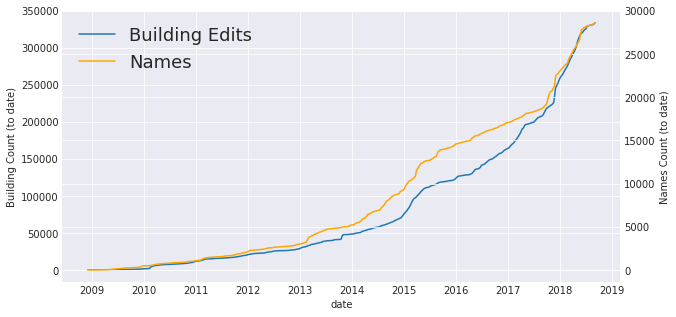

In [28]:
sns.set_style("darkgrid"); axes = []
axes.append( gb_dates.id.cumsum().rolling(window=7).mean().plot(figsize=(10,5)) )
axes.append( gb_dates.name.cumsum().rolling(window=7).mean().plot(figsize=(10,5), color='orange', ax=axes[0].twinx()) )
lines, labels = axes[0].get_legend_handles_labels()
for ax in axes[1:]:
    line, label = ax.get_legend_handles_labels()
    lines += line
axes[-1].legend(lines, ['Building Edits','Names'], loc=0, fontsize=18);
axes[0].set_ylabel('Building Count (to date)');
axes[1].set_ylabel('Names Count (to date)');


In [30]:
buildings.groupby('user').aggregate({'id':'nunique','version':'count','validSince':min,'validUntil':max}).sort_values(by='id',ascending=False).head(100)

,id,version,validSince,validUntil
user,,,,
chachafish,56894,151367,1407262136,1537318540
Your Village Maps,22894,35508,1321133012,1537318540
SeanMaday,10329,10755,1363189311,1537318540
volatile_ant,10039,10801,1487913811,1537318540
@kevin_bullock,9006,10927,1366139871,1537318540
CornCO,6830,7316,1467908236,1537318540
Berjoh,5958,9437,1289508059,1537318540
mattchn,4801,4871,1444104003,1537318540
RustProof Labs,4346,4795,1437088357,1537318540


# User Editing Network?

In [251]:
import networkx as nx

In [258]:
G = nx.DiGraph()
for line in open('../util/users.edgelist','r'):
    sourceLabel, targetLabel, weight = line.split(",")
    weight = int(weight)
    if weight > 15:
        G.add_edge(sourceLabel, targetLabel, weight=weight)

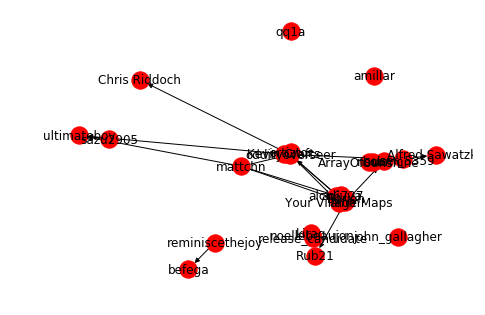

In [259]:
nx.draw_spring(G, with_labels=True)

In [260]:
nx.write_graphml(G,'/data/www/jennings/nepal_users.graphml');

In [261]:
gb_user = buildings.groupby('user').aggregate({'validSince':min, 'validUntil':max, 'version':'count','id':'nunique'})

In [268]:
gb_user['firstBuilding'] = gb_user.validSince.apply(lambda t: pd.Timestamp(t*1000000000).date())
gb_user['lastBuilding'] = gb_user.validUntil.apply(lambda t: pd.Timestamp(t*1000000000).date())

In [270]:
gb_user.head()

,validSince,validUntil,version,id,firstBuilding,lastBuilding
user,,,,,,
$agar11,1461967263,1535673544,7,6,2016-04-29,2018-08-30
+rama,1424001018,1424248590,1,1,2015-02-15,2015-02-18
-Christoph-,1429983843,1535673544,463,463,2015-04-25,2018-08-30
0109,1430289805,1431014646,1,1,2015-04-29,2015-05-07
048,1430455711,1535673544,40,40,2015-05-01,2018-08-30


Text(0.5,1,'Timespan of OSM Contributions to Buildings in Nepal')

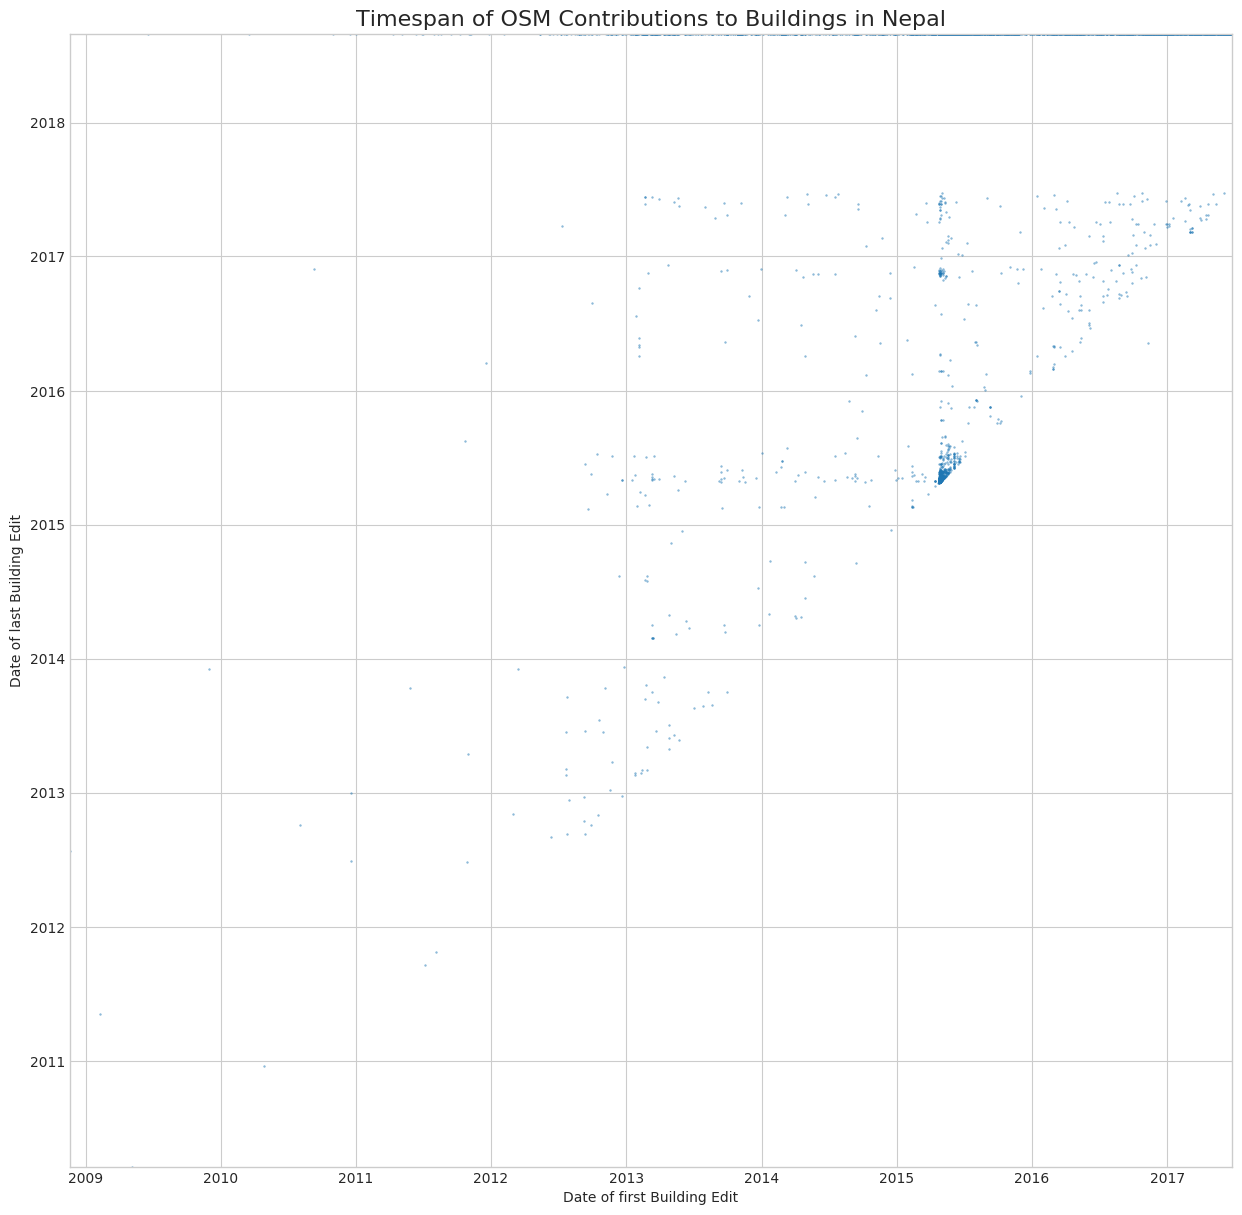

In [275]:
sns.set_style('whitegrid')
plt.figure(num=None, figsize=(15, 15), dpi=100, facecolor='w', edgecolor='k')
plt.plot(gb_user['firstBuilding'], gb_user['lastBuilding'], '+', markersize=2, alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(mdates.YearLocator())
plt.xlim([gb_user.firstBuilding.min() , gb_user.firstBuilding.max()])
plt.ylim([gb_user.lastBuilding.min(), gb_user.lastBuilding.max()])
plt.xlabel('Date of first Building Edit')
plt.ylabel('Date of last Building Edit')
plt.title("Timespan of OSM Contributions to Buildings in Nepal",fontsize=16)
# plt.savefig('/data/www/jennings/osm-timespans.png')

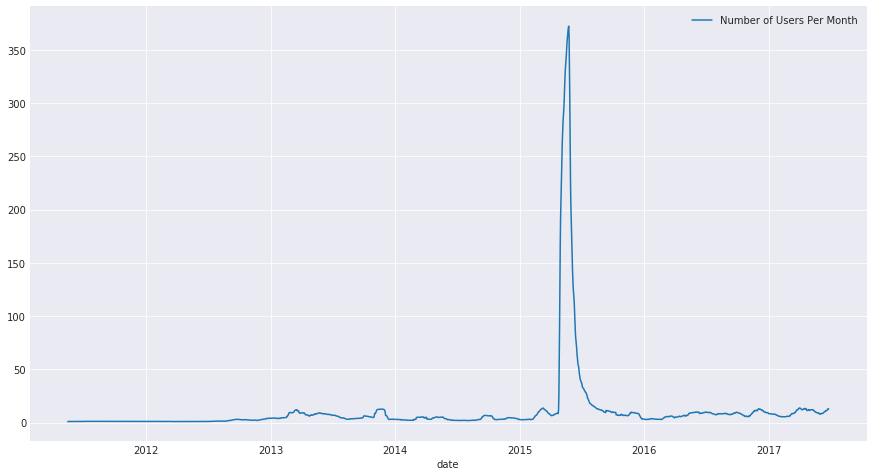

In [310]:
ax = gb_dates.user.rolling(30).mean().plot(figsize=(15,8))
ax.legend(["Number of Users Per Month"])

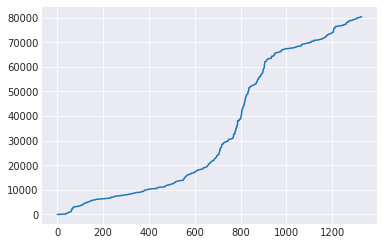

In [337]:
buildings.groupby('date',as_index=False).aggregate({'user':pd.Series.nunique, 'version':sum}).version.cumsum().plot()